In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
from homeharvest import scrape_property
from datetime import datetime
import time
import json
import numpy
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [15]:
#Scrape for housing data in Chicago, Illinois and predict house prices

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [149]:
#Used Home Harvest to scrape the housing data for Chicago
# time = datetime.now().strftime("%Y%m%d_%H%M%S")
# filename = f"Chicago_HomeHarvest_{time}.csv"

# properties = scrape_property(location="Chicago, IL", listing_type="sold", past_days = 200,
#     extra_property_data=True) 

# print(f"Number of properties: {len(properties)}")
# properties.to_csv(filename, index=False)
# print(properties.head())

#Then used pandas to read it
data = pd.read_csv("Chicago_HomeHarvest_2025.csv")
data.head()

,property_url,property_id,listing_id,permalink,mls,mls_id,status,mls_status,text,style,...,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/realestateandhomes-det...,8466932468,2.984323e+09,545-N-Dearborn-St-Apt-910_Chicago_IL_60654_M84...,CHIL,12421436.0,SOLD,Sold,"Rarely available 1-bed, 1-bath corner unit wit...",CONDOS,...,NaN,NaN,446831.0,O-CHIL-16379,@properties Christie's International Real Estate,jaynecocoran@atproperties.com,"[{'number': '3122540200', 'type': 'Office', 'p...","Il Dept Of Chldrn And Family Svcs, Chicago Pub...",https://ap.rdcpix.com/3e91fc48313651ba6bc4e31d...,https://ap.rdcpix.com/3e91fc48313651ba6bc4e31d...
1,https://www.realtor.com/realestateandhomes-det...,8991099778,2.984985e+09,933-W-Van-Buren-St-Apt-910_Chicago_IL_60607_M8...,CHIL,12423814.0,SOLD,Sold,"Welcome to this move-in ready, 2 bedroom/2 bat...",CONDOS,...,NaN,NaN,446831.0,O-CHIL-16379,@properties Christie's International Real Estate,jaynecocoran@atproperties.com,"[{'number': '3122540200', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/80412d5d99883413ac8ae9ab...,https://ap.rdcpix.com/80412d5d99883413ac8ae9ab...
2,https://www.realtor.com/realestateandhomes-det...,7406824871,2.982854e+09,6005-N-Canfield-Ave_Chicago_IL_60631_M74068-24871,CHIL,12387302.0,SOLD,Sold,"Welcome home to a solid, all brick raised ranc...",SINGLE_FAMILY,...,NaN,NaN,NaN,O-CHIL-28406,Peter Drossos Real Estate,NaN,"[{'number': '(773) 593-5626', 'type': 'Mobile'...",Region 05 North Cook Intermediate Service Cent...,https://ap.rdcpix.com/f90ebc293d8c08455ac62406...,https://ap.rdcpix.com/f90ebc293d8c08455ac62406...
3,https://www.realtor.com/realestateandhomes-det...,7426501379,2.985117e+09,1610-W-Fullerton-Ave-Unit-210_Chicago_IL_60614...,CHIL,12439722.0,SOLD,Sold,"Discover the perfect blend of style, comfort, ...",CONDOS,...,NaN,NaN,1948102.0,O-CHIL-85774,@properties East Lincoln Park,melodytorrens@atproperties.com,"[{'number': '7734720200', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/445877702e5a5435fe520229...,https://ap.rdcpix.com/445877702e5a5435fe520229...
4,https://www.realtor.com/realestateandhomes-det...,7317660066,2.983305e+09,4250-N-Marine-Dr-Apt-2105_Chicago_IL_60613_M73...,CHIL,12392775.0,SOLD,Sold,"Looking for a home with a captivating, unobstr...",CONDOS,...,NaN,NaN,4298235.0,O-CHIL-87738,Keller Williams ONEChicago,NaN,"[{'number': '3122162422', 'type': 'Office', 'p...",Chicago Public Schools,https://ap.rdcpix.com/25e83ee41c2b4df13b3d7f13...,https://ap.rdcpix.com/25e83ee41c2b4df13b3d7f13...


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

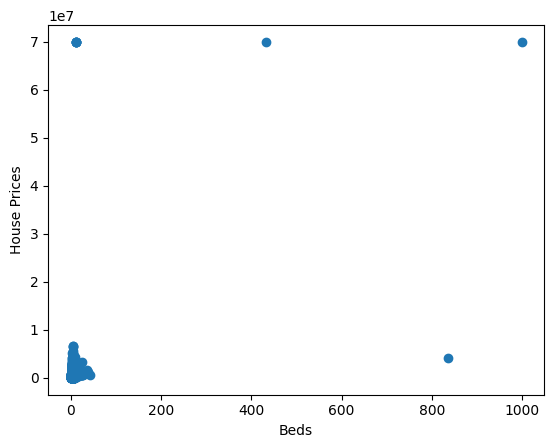

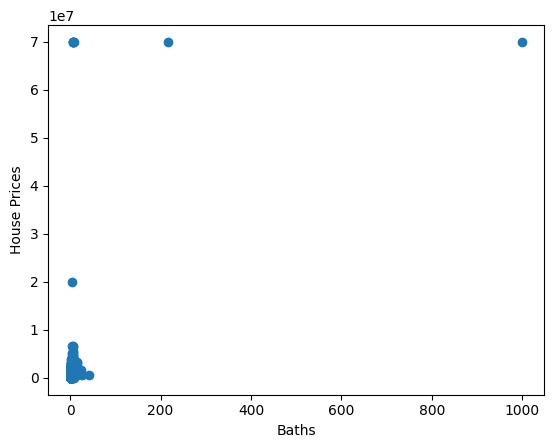

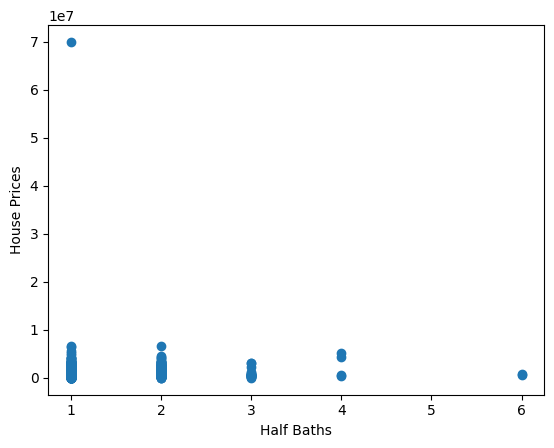

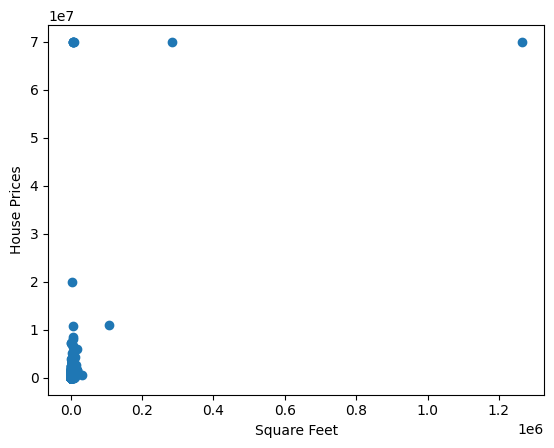

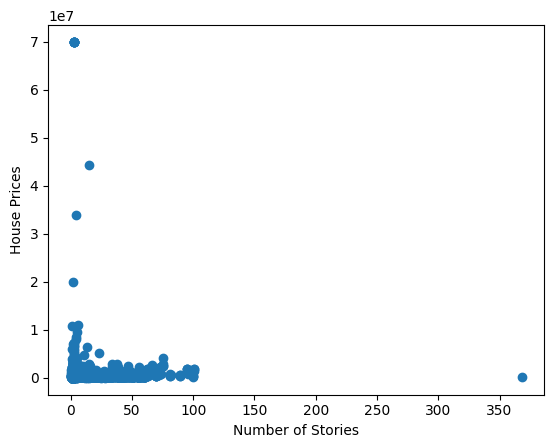

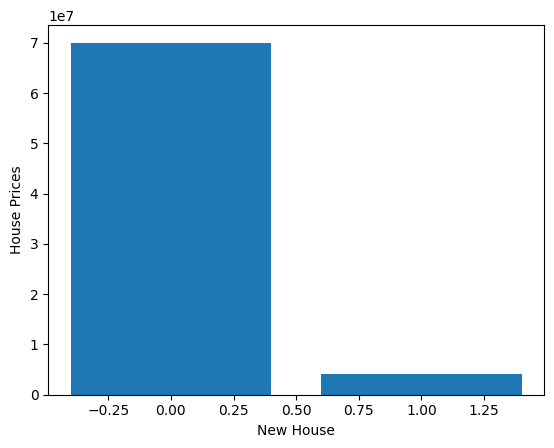

In [174]:
#Checking each category
plt.scatter(data['beds'], data['sold_price'])
plt.xlabel('Beds')
plt.ylabel('House Prices')
plt.show()

plt.scatter(data['full_baths'], data['sold_price'])
plt.xlabel('Baths')
plt.ylabel('House Prices')
plt.show()

plt.scatter(data['half_baths'],data['sold_price'])
plt.xlabel('Half Baths')
plt.ylabel('House Prices')
plt.show()

plt.scatter(data['sqft'],data['sold_price'])
plt.xlabel('Square Feet')
plt.ylabel('House Prices')
plt.show()

plt.scatter(data['stories'], data['sold_price'])
plt.xlabel('Number of Stories')
plt.ylabel('House Prices')
plt.show()

plt.bar(data['new_construction'], data['sold_price'])
plt.xlabel('New House')
plt.ylabel('House Prices')
plt.show()

#There is some outliers on house prices and there is some houses with more than 800 beds
#There is also a house with more than 350 stories


# 4.Prepare the Data


Apply any data transformations and explain what and why


In [ ]:
#Converts the data to variables for training and removes the data that contains no values
x = data[['beds', 'full_baths', 'half_baths', 'year_built', 'lot_sqft', 'nearby_schools']].notna()
y = data['sold_price']




# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [ ]:
#Using the prices and new construction and decision tree model to train model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(x, y)

reg = linear_model.LogisticRegression(max_iter=1000, random_state=42)
reg.fit(x_train, y_train)

print("Tree Training Accuracy:", tree.score(x_train, y_train))
print("Log Training Accuracy:", reg.score(x_train, y_train))


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 